In [1]:
file_path = r"/user/root/ineuron/ml/finance-complaint/ingested_data/finance.parquet"

In [2]:
df=spark.read.parquet(file_path)

In [3]:
df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- ingested_date: timestamp (nullable = true)



In [4]:
print(f"Number of columns: {len(df.columns)}")
df.columns


Number of columns: 19


['company',
 'company_public_response',
 'company_response',
 'complaint_id',
 'complaint_what_happened',
 'consumer_consent_provided',
 'consumer_disputed',
 'date_received',
 'date_sent_to_company',
 'issue',
 'product',
 'state',
 'sub_issue',
 'sub_product',
 'submitted_via',
 'tags',
 'timely',
 'zip_code',
 'ingested_date']

In [5]:
df.createOrReplaceTempView("complaint")

In [6]:
target_column = spark.sql("select consumer_disputed,count(complaint_id) from complaint  group by consumer_disputed")

In [7]:
import matplotlib.pyplot as plt

In [8]:
target_distribution = target_column.toPandas()

In [9]:
target_distribution

,consumer_disputed,count(complaint_id)
0,No,620078
1,N/A,2000810
2,Yes,148378


In [10]:
target_distribution.set_index("consumer_disputed",inplace=True)

In [11]:
target_distribution

,count(complaint_id)
consumer_disputed,
No,620078
N/A,2000810
Yes,148378


In [12]:
target_distribution.index

Index(['No', 'N/A', 'Yes'], dtype='object', name='consumer_disputed')

/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


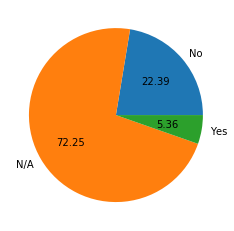

In [13]:
plt.pie(target_distribution,labels=target_distribution.index,autopct='%.2f')
plt.show()

In [14]:
full_dataset = spark.sql("select * from complaint where consumer_disputed<>'N/A'")

In [15]:
full_dataset.createOrReplaceTempView("full_dataset")

In [16]:
target_distribution = spark.sql("select consumer_disputed,count(complaint_id) from full_dataset  group by consumer_disputed")

In [17]:
target_dist_df = target_distribution.toPandas()

In [18]:
target_dist_df

,consumer_disputed,count(complaint_id)
0,No,620078
1,Yes,148378


In [19]:
620078/148378

4.179042715227324

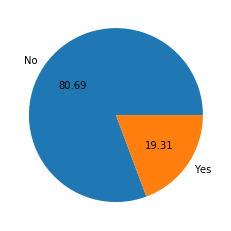

In [20]:
plt.pie(target_dist_df['count(complaint_id)'],labels=target_dist_df['consumer_disputed'],autopct='%.2f')
plt.show()

In [21]:
full_dataset.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- ingested_date: timestamp (nullable = true)



## Number of No value

In [22]:
complaint_not_disputed= spark.sql("select * from full_dataset where consumer_disputed='No'")

Number of Yes Value

In [23]:
complaint_not_disputed.createOrReplaceTempView("complaint_not_disputed")

In [24]:
complaint_not_disputed.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- ingested_date: timestamp (nullable = true)



In [25]:
spark.sql("select count(*) from (select count(*)  from complaint_not_disputed group by product,sub_product,state)").show()

+--------+
|count(1)|
+--------+
|    2520|
+--------+



In [51]:
strata_df=spark.sql("""select *,MD5(CONCAT(ifnull(product,''), ifnull(sub_product,''), ifnull(state,''))) as cat from  complaint_not_disputed
          """)

In [56]:
strata_df.createOrReplaceTempView("strata_df")

In [63]:
spark.sql("""select count(*) from strata_df""").show(1)

+--------+
|count(1)|
+--------+
|  620078|
+--------+



In [92]:
clean.show(2)

+-------+-----------------------+----------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+-----+-------+-----+---------+-----------+-------------+----+------+--------+-------------+---+
|company|company_public_response|company_response|complaint_id|complaint_what_happened|consumer_consent_provided|consumer_disputed|date_received|date_sent_to_company|issue|product|state|sub_issue|sub_product|submitted_via|tags|timely|zip_code|ingested_date|cat|
+-------+-----------------------+----------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+-----+-------+-----+---------+-----------+-------------+----+------+--------+-------------+---+
+-------+-----------------------+----------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+-----+-------+-----+---------+-----------+------

In [94]:
from pyspark.sql.functions import lit

In [103]:
fractions = strata_df.select("cat").distinct().withColumn("fraction", lit(0.3)).rdd.collectAsMap()
                                                           
# {2147481832: 0.8, 214748183: 0.8}
sampled_df = strata_df.stat.sampleBy("cat", fractions, seed=3)
sampled_df.show(2)

+--------------------+-----------------------+--------------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+--------------------+---------------+-----+--------------------+-------------+-------------+--------------------+------+--------+--------------------+--------------------+
|             company|company_public_response|    company_response|complaint_id|complaint_what_happened|consumer_consent_provided|consumer_disputed|date_received|date_sent_to_company|               issue|        product|state|           sub_issue|  sub_product|submitted_via|                tags|timely|zip_code|       ingested_date|                 cat|
+--------------------+-----------------------+--------------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+--------------------+---------------+-----+--------------------+-------------+-------------+---------------

In [104]:
sampled_df.createOrReplaceTempView("final_no_complaint")

In [105]:
spark.sql("select count(*) from final_no_complaint").show()

+--------+
|count(1)|
+--------+
|  185941|
+--------+



In [113]:
required_df = spark.sql("""
select ct.* from complaint ct left join final_no_complaint  cnt
on ct.complaint_id=cnt.complaint_id
where (ct.consumer_disputed='Yes' and cnt.complaint_id is null) or (cnt.complaint_id is not null)
""")

In [114]:
required_df.count()

334319

In [115]:
required_df.createOrReplaceTempView("req_complaint")

In [123]:
required_df = spark.sql("select *,MD5(CONCAT(ifnull(product,''), ifnull(sub_product,''), ifnull(state,''), ifnull(consumer_disputed,''))) cat from  req_complaint")

In [125]:
required_df.createOrReplaceTempView("req_complaint_cat")

In [128]:
fractions = required_df.select("cat").distinct().withColumn("fraction", lit(0.7)).rdd.collectAsMap()
                                                           
# {2147481832: 0.8, 214748183: 0.8}
required_df = required_df.stat.sampleBy("cat", fractions, seed=3)
required_df.show(2)

+--------------------+-----------------------+--------------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+--------------------+----------------+-----+--------------+--------------------+-------------+----+------+--------+--------------------+--------------------+
|             company|company_public_response|    company_response|complaint_id|complaint_what_happened|consumer_consent_provided|consumer_disputed|date_received|date_sent_to_company|               issue|         product|state|     sub_issue|         sub_product|submitted_via|tags|timely|zip_code|       ingested_date|                 cat|
+--------------------+-----------------------+--------------------+------------+-----------------------+-------------------------+-----------------+-------------+--------------------+--------------------+----------------+-----+--------------+--------------------+-------------+----+------+--------+--------------------

In [129]:
required_df.count()

234257

In [145]:
required_df.createOrReplaceTempView("train_df")

In [141]:
test_df = spark.sql("select rcc.* from req_complaint_cat rcc left join train_df  td on rcc.complaint_id=td.complaint_id  where td.complaint_id is null ")

In [143]:
test_df.createOrReplaceTempView("test_df")

In [149]:
spark.sql("select count(*)/234257 from train_df group by consumer_disputed").show(2)

+-------------------+
|(count(1) / 234257)|
+-------------------+
| 0.5557784826067097|
| 0.4442215173932903|
+-------------------+



In [144]:
spark.sql("select count(*)/99871 from test_df group by consumer_disputed").show()

+-------------------+
| (count(1) / 99871)|
+-------------------+
| 0.5567482051846883|
|0.44325179481531174|
+-------------------+



In [135]:
train_df.count()

234257

In [136]:
test_df.count()

99871

In [150]:
required_df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- ingested_date: timestamp (nullable = true)
 |-- cat: string (nullable = false)



In [151]:
train_df=required_df

In [152]:
train_df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- ingested_date: timestamp (nullable = true)
 |-- cat: string (nullable = false)



In [153]:
test_df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- ingested_date: timestamp (nullable = true)
 |-- cat: string (nullable = false)



In [287]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

In [288]:
train_df = spark.sql("select company_response,state,product,sub_issue,sub_product,zip_code,consumer_disputed from train_df ")

In [289]:
test_df = spark.sql("select company_response,state,product,sub_issue,sub_product,zip_code,consumer_disputed from test_df ")

In [290]:
train_df.select("company_response").distinct().collect()

[Row(company_response='Untimely response'),
 Row(company_response='Closed with non-monetary relief'),
 Row(company_response='Closed without relief'),
 Row(company_response='Closed with monetary relief'),
 Row(company_response='Closed with explanation'),
 Row(company_response='Closed'),
 Row(company_response='Closed with relief')]

In [291]:
indexer = StringIndexer(inputCols=["company_response","consumer_disputed","product","state"], outputCols=["company_response_index","consumer_disputed_index","product_index","state_index"])

In [292]:
#train_df=indexer.fit(train_df).transform(train_df)

In [293]:
ohe = OneHotEncoder(inputCols=["company_response_index","product_index","state_index"], outputCols=["company_response_index_o_h_e_v","product_index_o_h_e_v","state_index_o_h_e_v"])

#   ##  fit the ohe model and use it to transform the numeric indices into ohe vectors
#train_df = ohe.fit(train_df).transform(train_df)



In [294]:
from pyspark.ml.feature import VectorAssembler

In [295]:
required_column=[]

In [296]:
vector_assembler= VectorAssembler(inputCols=["company_response_index_o_h_e_v","product_index_o_h_e_v","state_index_o_h_e_v"], outputCol="input_features")

In [297]:
from pyspark.ml import Pipeline

In [298]:
pipeline =Pipeline(stages=[indexer,ohe,vector_assembler])

In [299]:
pipeline_obj = pipeline.fit(train_df)

IllegalArgumentException: requirement failed: Cannot have an empty string for name.

In [ ]:
train_df = pipeline_obj.transform(train_df)

In [ ]:
from pyspark.ml.classification import  RandomForestClassifier

In [ ]:
random_forest_clf =RandomForestClassifier(featuresCol="input_features",labelCol="consumer_disputed_index")

In [ ]:
random_forest_model = random_forest_clf.fit(train_df)

In [ ]:

train_prediction = random_forest_model.transform(train_df)



In [ ]:

test_df = pipeline_obj.transform(test_df)

testing_prediction = random_forest_model.transform(test_df)


training_data = train_prediction.select("consumer_disputed_index", "prediction")
testing_prediction = testing_prediction.select("consumer_disputed_index", "prediction")

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [ ]:
training_data.show(2)

In [ ]:
testing_prediction.show(2)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score

In [ ]:
y_train,yhat=train_prediction.toPandas()['consumer_disputed_index'],train_prediction.toPandas()['prediction']

In [ ]:
confusion_matrix(y_train,yhat)

In [ ]:
f1_score(y_train,yhat)